In [1]:
import pandas as pd
import sys
import os
from shutil import copyfile
import collections
import pyarrow.parquet as pq
import MDAnalysis as mda
import MDAnalysis.analysis.contacts as contacts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
home_dir = '/home/stanislc/projects/1_cphmd/benchmark_proteins_no_hmr_wat'
system_dir = '1beg'

u = mda.Universe(f'{home_dir}/{system_dir}/prep/system.psf', f'{home_dir}/{system_dir}/sim_1/dcd/001_00.dcd')

/home/stanislc/software/mambaforge/envs/mda/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
all_resnames = np.unique(u.atoms.resnames)
# Select resnames with 4 letters
resnames_4 = [resname for resname in all_resnames if len(resname) == 4 and resname!='TIP3']
# Put them in a string for like 'resname XXXX or resname YYYY or ...'
print('Resnames with 4 letters:', resnames_4)
sele_titr = u.select_atoms(' or '.join([f'resname {resname}' for resname in resnames_4]))
sele_waters_ions = u.select_atoms('segid SOLV or segid IONS')
sele_others = u.atoms - sele_titr - sele_waters_ions
print('Selected atoms:', sele_titr.n_atoms, sele_others.n_atoms, sele_waters_ions.n_atoms)

Resnames with 4 letters: ['ASH1', 'ASH2', 'ASPO', 'LYSO', 'LYSU', 'SERD', 'SERO', 'TYRO', 'TYRU']
Selected atoms: 311 1280 39289


In [ ]:
import MDAnalysis.analysis.contacts as contacts
import MDAnalysis as mda
import MDAnalysis.lib.distances as distances


sele_prot = u.atoms - sele_waters_ions

for ts in u.trajectory:
    # Calculate distances between all atoms in sele_titr and sele_waters_ions
    dist = distances.distance_array(sele_titr.positions, sele_waters_ions.positions, box=u.dimensions)
    # Find the minimum distance between each atom in sele_titr and sele_waters_ions
    min_dist = np.min(dist, axis=1)
    # Find the closest


array([[ 0.        ,  1.03999969,  1.0400015 , ..., 28.70709799,
        28.01597324, 26.86954079],
       [ 1.03999969,  0.        ,  1.60617128, ..., 28.47904385,
        27.77861518, 26.68229455],
       [ 1.0400015 ,  1.60617128,  0.        , ..., 29.51694257,
        28.862379  , 27.68603699],
       ...,
       [28.70709799, 28.47904385, 29.51694257, ...,  0.        ,
         1.82298   ,  2.15102784],
       [28.01597324, 27.77861518, 28.862379  , ...,  1.82298   ,
         0.        ,  2.1883684 ],
       [26.86954079, 26.68229455, 27.68603699, ...,  2.15102784,
         2.1883684 ,  0.        ]])

array([[ 0.        ,  1.11100052,  1.11099937, ..., 29.9214794 ,
        29.14215248, 28.21237926],
       [ 1.11100052,  0.        ,  1.71557637, ..., 30.36768393,
        29.54415148, 28.63674758],
       [ 1.11099937,  1.71557637,  0.        , ..., 29.01246004,
        28.24706024, 27.28121339],
       ...,
       [29.9214794 , 30.36768393, 29.01246004, ...,  0.        ,
         1.75522991,  2.04250963],
       [29.14215248, 29.54415148, 28.24706024, ...,  1.75522991,
         0.        ,  2.09363957],
       [28.21237926, 28.63674758, 27.28121339, ...,  2.04250963,
         2.09363957,  0.        ]])

,1,2,3,4,5,6,7,8,9,10,...,78,78,86,86,92,92,96,96,97,97
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


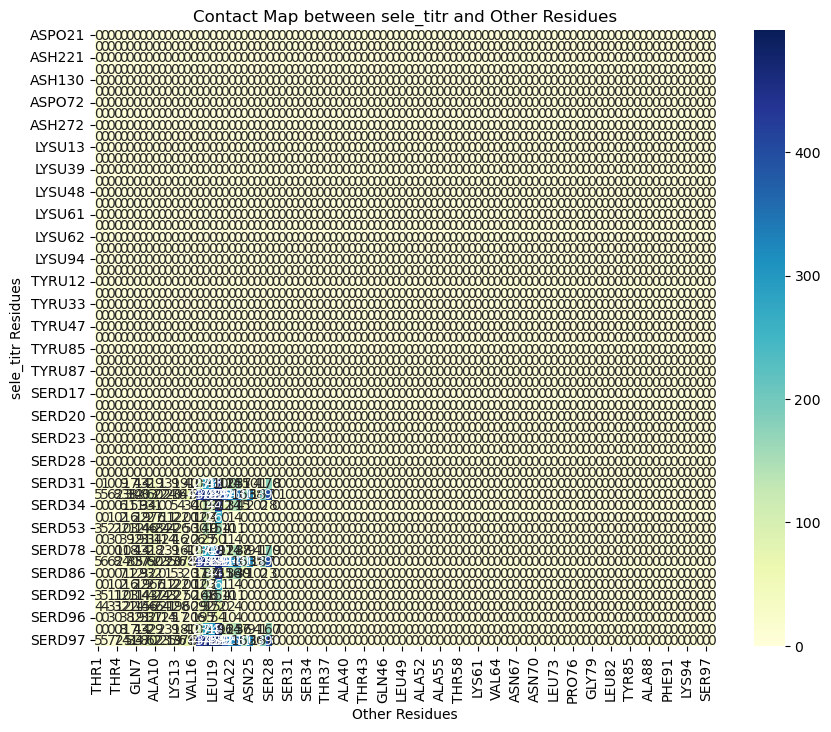

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_combined, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Contact Map between sele_titr and Other Residues')
plt.xlabel('Other Residues')
plt.ylabel('sele_titr Residues')
plt.show()